In [7]:
import Data_Prep
import train_Reptile
import train_MAML
import train_iMAML

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
data = Data_Prep.DataPreparation()

ml10 = data.get_data()
data.construct_episodes(ml10)
X, y, task_lengths = data.prepare_data()

mw/cls_sweep-v2
mw/cls_push-v2
mw/cls_door-open-v2
mw/cls_peg-insert-side-v2
mw/cls_drawer-close-v2
mw/cls_basketball-v2
mw/cls_reach-v2
mw/cls_window-open-v2
mw/cls_pick-place-v2
mw/cls_button_press_topdown-v2


  0%|          | 0/250 [00:00<?, ?it/s]

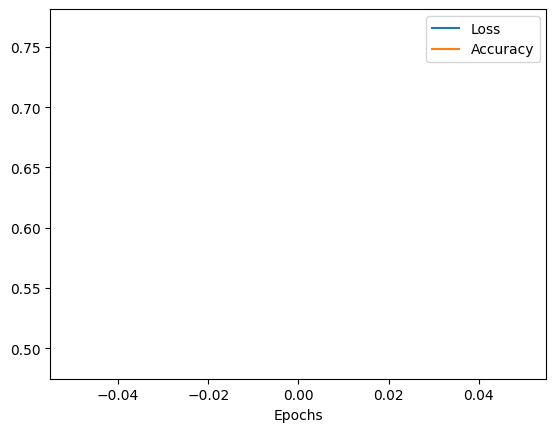

Epoch: 0, Loss: 0.7673699259757996, accuracy: 0.48861950635910034


 10%|█         | 25/250 [01:09<10:06,  2.69s/it]

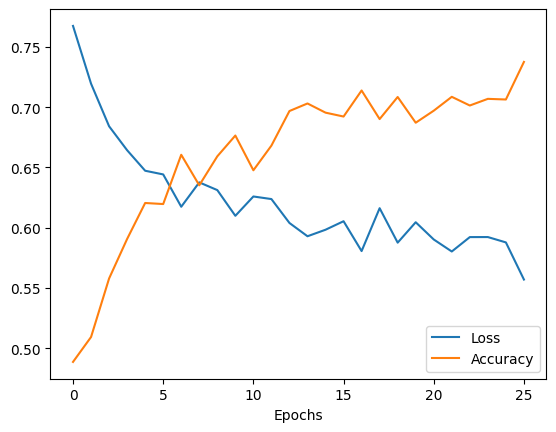

Epoch: 25, Loss: 0.5569649338722229, accuracy: 0.7375084161758423


 20%|██        | 50/250 [02:17<08:49,  2.65s/it]

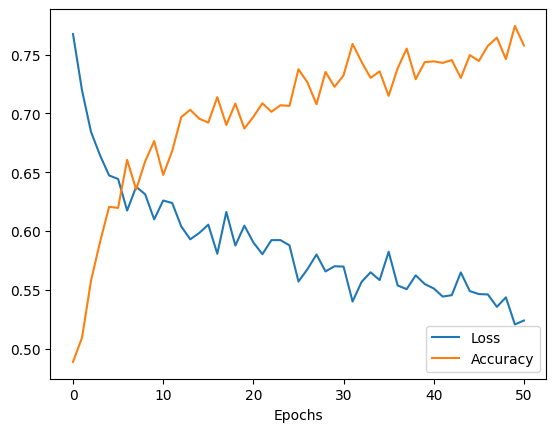

Epoch: 50, Loss: 0.5238287448883057, accuracy: 0.7577104568481445


 30%|███       | 75/250 [03:23<07:38,  2.62s/it]

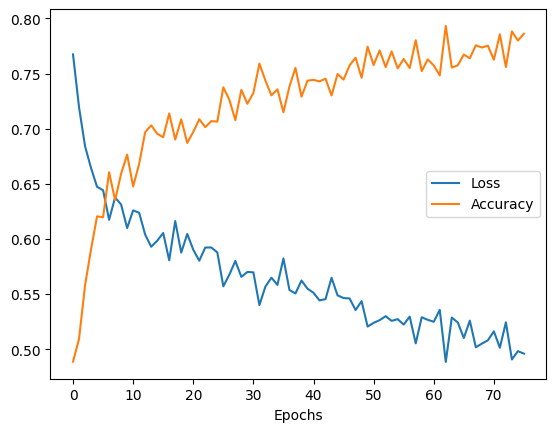

Epoch: 75, Loss: 0.495919793844223, accuracy: 0.7861279249191284


 40%|████      | 100/250 [04:32<06:51,  2.74s/it]

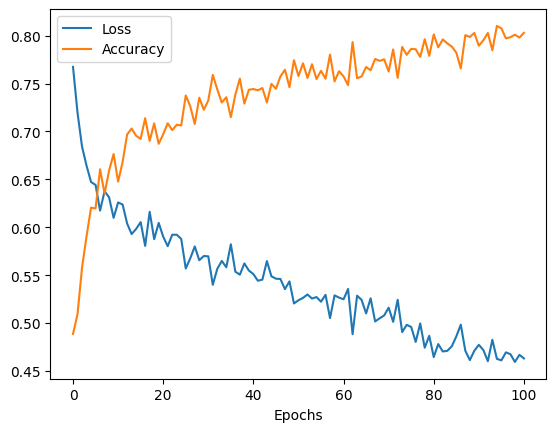

Epoch: 100, Loss: 0.4631462097167969, accuracy: 0.8028956651687622


 50%|█████     | 125/250 [05:40<05:43,  2.75s/it]

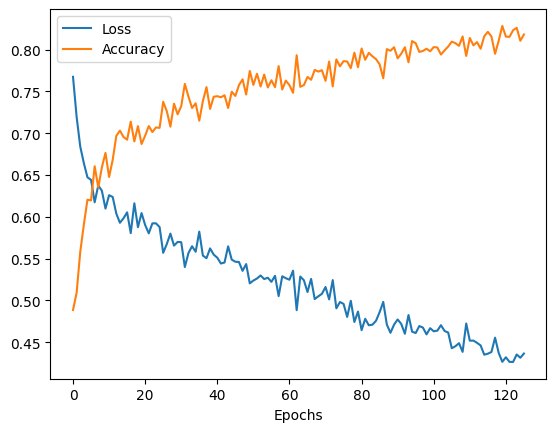

Epoch: 125, Loss: 0.43654870986938477, accuracy: 0.8179798126220703


 60%|██████    | 150/250 [06:48<04:29,  2.70s/it]

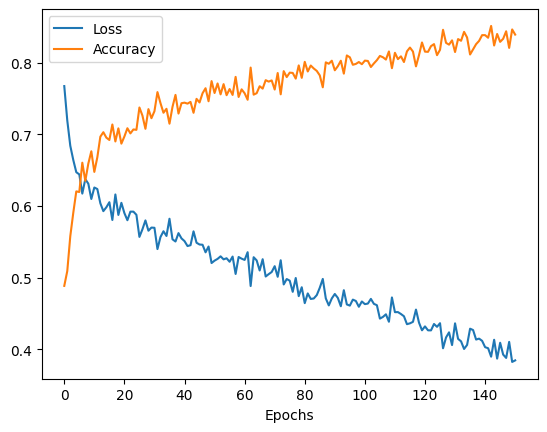

Epoch: 150, Loss: 0.38466426730155945, accuracy: 0.8391920328140259


 70%|███████   | 175/250 [07:55<03:22,  2.71s/it]

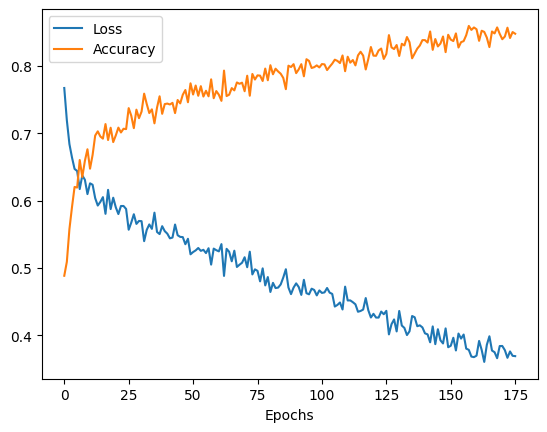

Epoch: 175, Loss: 0.3692905008792877, accuracy: 0.8479461669921875


 80%|████████  | 200/250 [09:04<02:15,  2.72s/it]

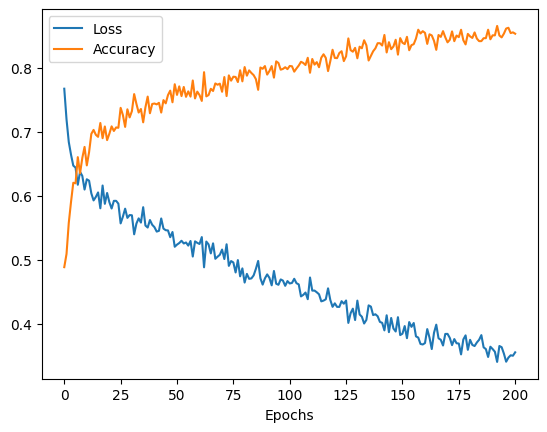

Epoch: 200, Loss: 0.3555622398853302, accuracy: 0.8532660603523254


 90%|█████████ | 225/250 [10:12<01:09,  2.76s/it]

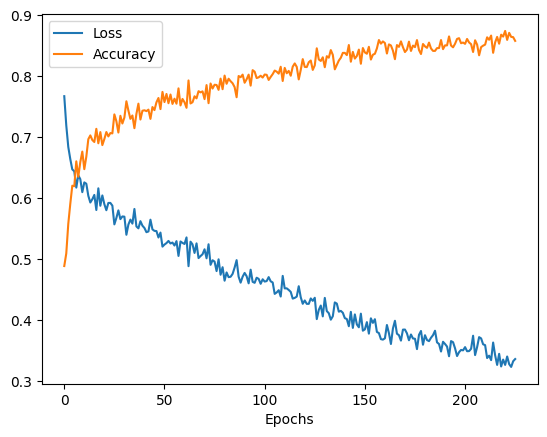

Epoch: 225, Loss: 0.3359844982624054, accuracy: 0.8581145405769348


100%|██████████| 250/250 [11:20<00:00,  2.72s/it]


In [13]:
import torch
input_size = 43
hidden_size1 = 256
hidden_size2 = 256
hidden_size3 = 256

maml_model = train_MAML.MAML(input_size, hidden_size1, hidden_size2, hidden_size3)
maml_model.train(X, y, task_lengths, 250)
#save the model in the models directory



In [16]:
torch.save(maml_model.model.state_dict(), '../models/maml_model.pth')

RuntimeError: Parent directory ./models does not exist.

  0%|                                                  | 0/2000 [00:00<?, ?it/s]

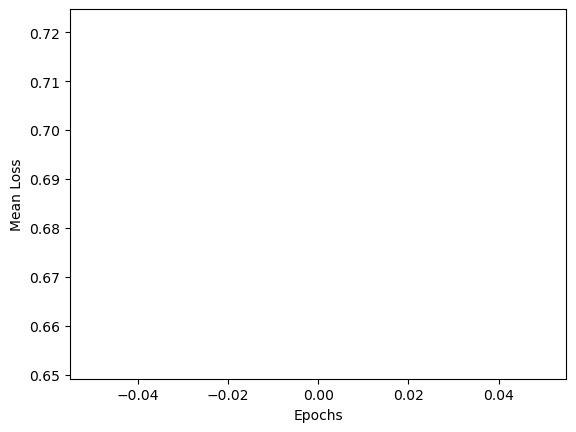

Epoch: 0, Loss: 0.686941921710968


  1%|▍                                      | 25/2000 [06:48<8:54:05, 16.23s/it]

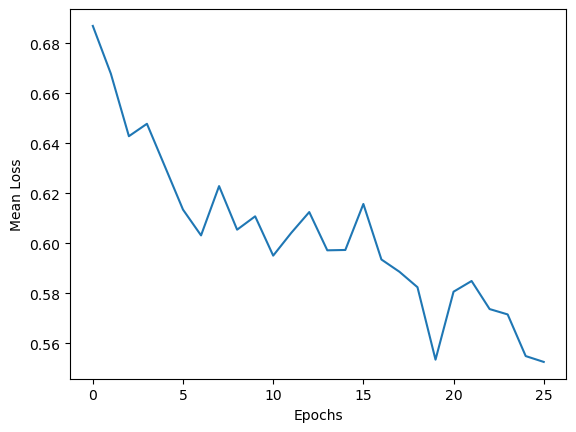

Epoch: 25, Loss: 0.5525379776954651


  1%|▌                                      | 28/2000 [07:36<8:51:33, 16.17s/it]

In [17]:
input_size = 43
hidden_size1 = 256
hidden_size2 = 256
hidden_size3 = 256

# reptile_model = train_Reptile.Reptile(input_size, hidden_size1, hidden_size2, hidden_size3)
# reptile_model.train(X, y, task_lengths, 2000)

# maml_model = train_MAML.MAML(input_size, hidden_size1, hidden_size2, hidden_size3)
# maml_model.train(X,y,task_lengths,2000)

imaml_model = train_iMAML.iMAML(input_size, hidden_size1, hidden_size2, hidden_size3)
imaml_model.train(X,y,task_lengths,2000)